In [11]:
# import necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA

In [101]:
# BALANCE : Balance amount left in their account to make purchases
# BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 
                    # (1 = frequently updated, 0 = not frequently updated)
# PURCHASES : Amount of purchases made from account
# ONEOFF_PURCHASES : Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES : Amount of purchase done in installment
# CASH_ADVANCE : Cash in advance given by the user
# PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 
                     # (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go 
                            # (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done 
                                # (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY
# CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
# PURCHASES_TRX
# CREDIT_LIMIT:  Limit of Credit Card for user
# PAYMENTS : Amount of Payment done by user
# MINIMUM_PAYMENTS : Minimum amount of payments made by user
# PRCFULLPAYMENT : Percent of full payment paid by user
# TENURE : Tenure of credit card service for user

In [3]:
# load the data
df=pd.read_csv('CC GENERAL.csv')

# data overview
df.sample(8)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6722,C16910,736.736738,1.000000,1171.50,1003.54,167.96,0.000000,0.75,0.75,0.333333,0.000000,0,26,4000.0,2092.544158,200.597917,0.000000,12
4980,C15121,92.325796,1.000000,371.16,0.00,371.16,0.000000,1.00,0.00,1.000000,0.000000,0,12,2000.0,205.804949,170.367631,0.166667,12
6439,C16615,88.905573,0.727273,537.56,537.56,0.00,0.000000,0.25,0.25,0.000000,0.000000,0,6,2500.0,563.972982,210.924256,0.000000,12
1598,C11651,48.822128,1.000000,537.51,0.00,537.51,0.000000,1.00,0.00,0.833333,0.000000,0,12,1000.0,478.875501,177.734472,1.000000,12
3903,C14013,1509.525178,1.000000,0.00,0.00,0.00,1784.023712,0.00,0.00,0.000000,0.250000,5,0,3500.0,513.387513,518.481808,0.000000,12
8034,C18251,1378.110585,1.000000,0.00,0.00,0.00,192.997392,0.00,0.00,0.000000,0.083333,1,0,2500.0,2673.832747,675.477318,0.083333,12
559,C10583,181.463092,1.000000,133.39,133.39,0.00,219.143859,0.25,0.25,0.000000,0.166667,2,3,2500.0,168.425788,169.473399,0.000000,12
1831,C11892,4402.354047,1.000000,0.00,0.00,0.00,2117.809244,0.00,0.00,0.000000,0.250000,10,0,5000.0,1030.120113,1162.586801,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# check missing values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

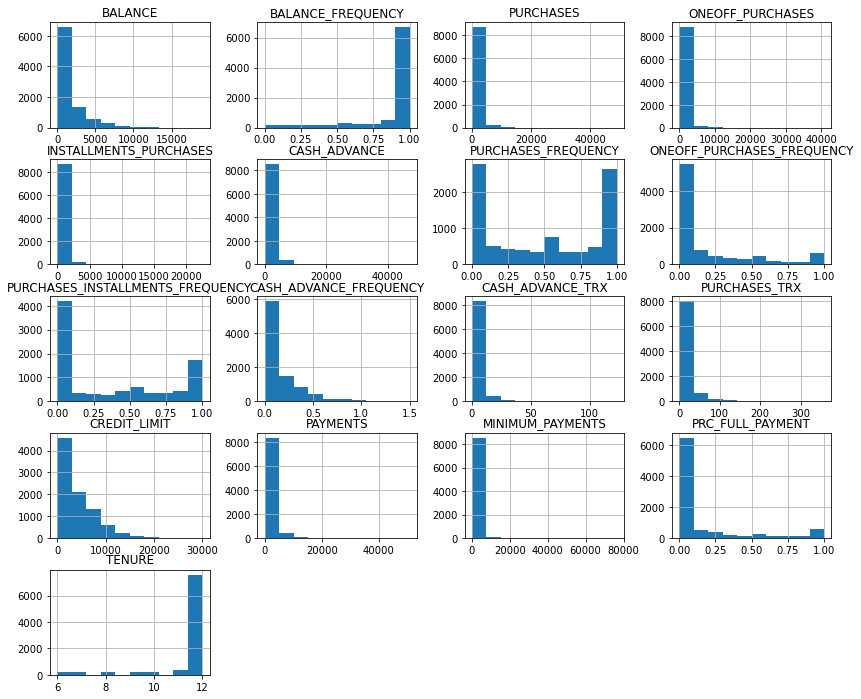

In [4]:
# plot histograms of distribution of each variable
df.hist(figsize=(14,12))
plt.show()

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# drop ID column
df.drop('CUST_ID', axis=1, inplace=True)

# Data cleaning - dealing with missing values

In [9]:
# impute with Iterative Imputer
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

In [10]:
# double check
df_imputed.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

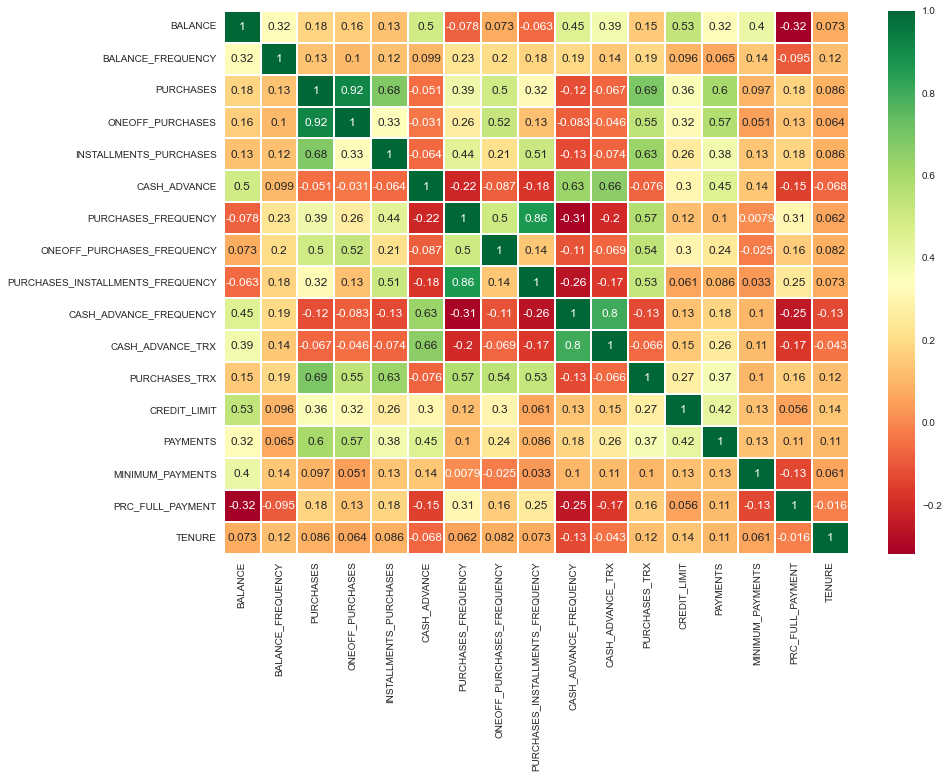

In [12]:
# check the correlation between variables
corr=df_imputed.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.05)
plt.show()

# Modelling

### 1 Model after scalling

In [15]:
X = np.asarray(df_imputed)

scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xs

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30143092,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09785364,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09264589,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32586807,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33728068,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32335526,
        -0.52555097, -4.12276757]])

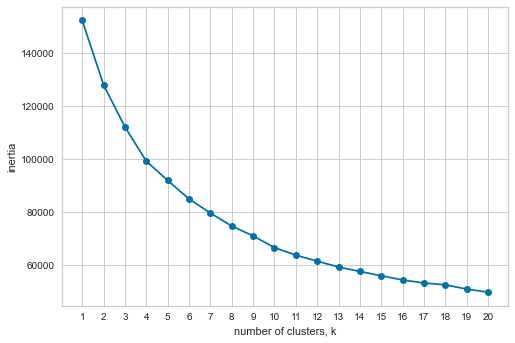

In [26]:
# Clustering using K-Means
ks = range(1, 21)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(Xs)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
fig, ax = plt.subplots()
ax.plot(ks, inertias, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('inertia')
ax.set_xticks(ks)
plt.show()

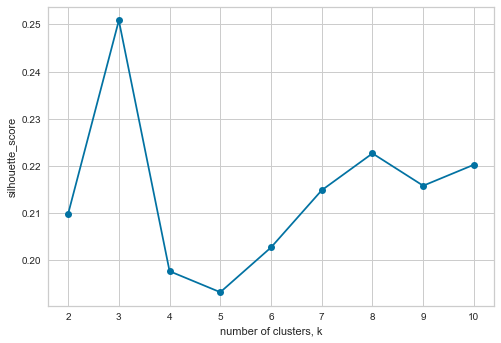

In [27]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
ks=range(2, 11)
score=[]
for n in ks:
    km = KMeans(n_clusters=n, random_state=42)
    km.fit_predict(Xs)
    score.append(silhouette_score(Xs, km.labels_, metric='euclidean'))

# Plot ks vs inertias
fig, ax = plt.subplots()
ax.plot(ks, score, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('silhouette_score')
ax.set_xticks(ks)
plt.show()

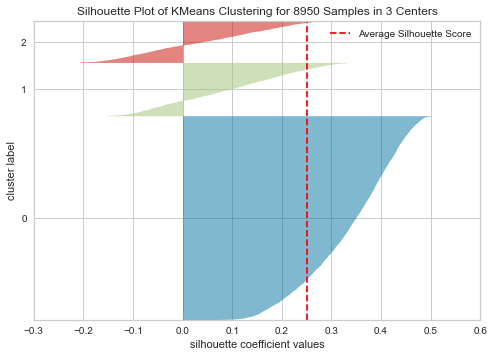

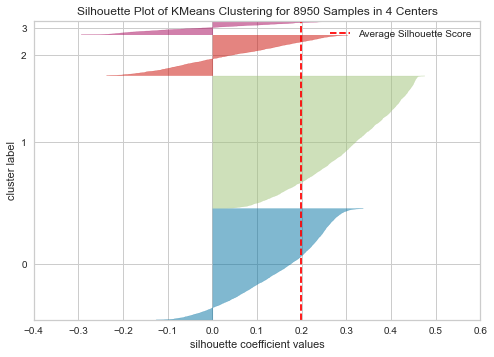

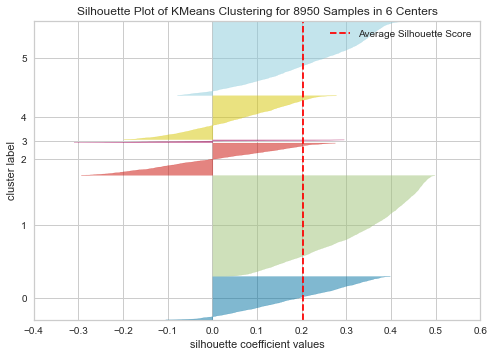

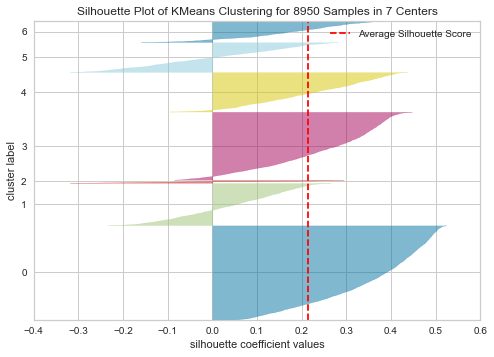

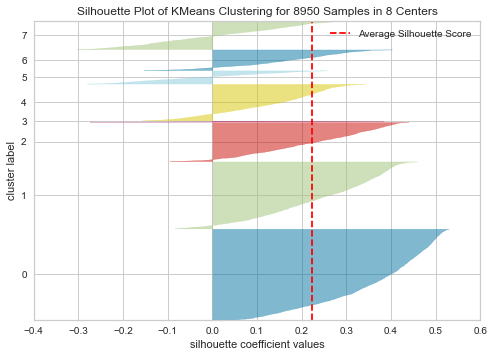

In [28]:
# Silhouette plots
fig, ax = plt.subplots()
for k in [3,4,6,7,8]:
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(Xs)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

#### It's hard to day how many clusters will be the best choice after scaling the data. 
#### After KMeans 4-5 clusters would be the best, The silhouette_score gives 3 clusters.

In [16]:
# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(Xs)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.46453636404405785        Inertia:  49699.24754736071
Silhouette-Score for 3 Clusters:  0.45060189858825583        Inertia:  33036.32948222095
Silhouette-Score for 4 Clusters:  0.40727790983518963        Inertia:  24551.069449677536
Silhouette-Score for 5 Clusters:  0.40036243909497504        Inertia:  19488.479534467097
Silhouette-Score for 6 Clusters:  0.3827946629031303        Inertia:  16234.94517565964

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3406684013373207        Inertia:  62104.39264981953
Silhouette-Score for 3 Clusters:  0.38008380175881934        Inertia:  46358.52908636464
Silhouette-Score for 4 Clusters:  0.3683646472674511        Inertia:  34721.17701477106
Silhouette-Score for 5 Clusters:  0.36747935310269164        Inertia:  28658.65099489397
Silhouette-Score for 6 Clusters:  0.3318969402766076        Inertia:  24912.882287037482

PCA with # of components:  4
Silhouette-Score for 2

### 2 Model after normalizing

In [17]:
normalizer = Normalizer()
Xn = normalizer.fit_transform(X)

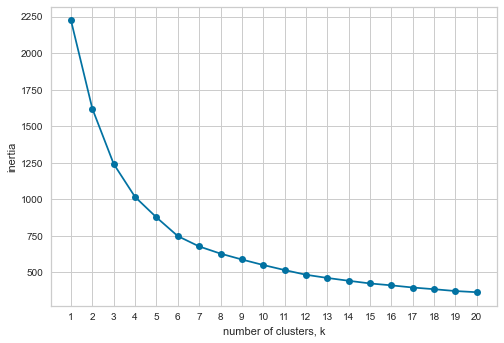

In [30]:
ks = range(1, 21)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(Xn)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
fig, ax = plt.subplots()
ax.plot(ks, inertias, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('inertia')
ax.set_xticks(ks)
plt.show()

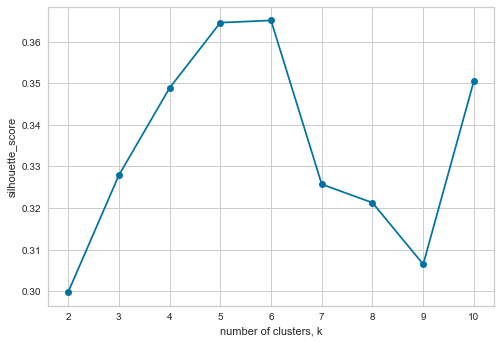

In [31]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
ks=range(2, 11)
score=[]
for n in ks:
    km = KMeans(n_clusters=n, random_state=42)
    km.fit_predict(Xn)
    score.append(silhouette_score(Xn, km.labels_, metric='euclidean'))

# Plot ks vs inertias
fig, ax = plt.subplots()
ax.plot(ks, score, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('silhouette_score')
ax.set_xticks(ks)
plt.show()

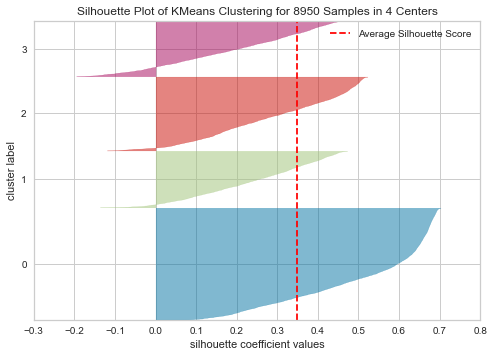

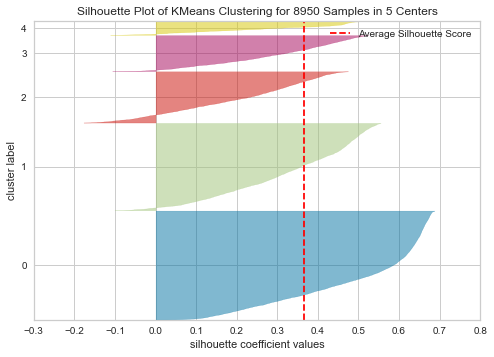

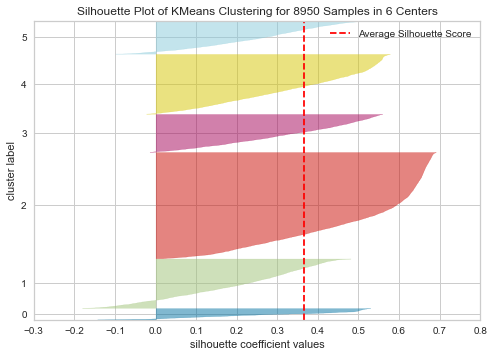

In [32]:
fig, ax = plt.subplots()
for k in [4,5,6]:
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(Xn)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [18]:
# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(Xn)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.4457731514364652        Inertia:  761.2073500696891
Silhouette-Score for 3 Clusters:  0.5085037503271271        Inertia:  389.950900874416
Silhouette-Score for 4 Clusters:  0.48859760607281216        Inertia:  285.09414715076366
Silhouette-Score for 5 Clusters:  0.4606390338574621        Inertia:  217.72947771620866
Silhouette-Score for 6 Clusters:  0.4562574438692085        Inertia:  178.5016586978943

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3663768018648966        Inertia:  1128.7948254903986
Silhouette-Score for 3 Clusters:  0.4082283006002968        Inertia:  755.2308333280283
Silhouette-Score for 4 Clusters:  0.4330019566437184        Inertia:  541.5132818900673
Silhouette-Score for 5 Clusters:  0.42020263494744453        Inertia:  444.74524526797563
Silhouette-Score for 6 Clusters:  0.37483112059866924        Inertia:  379.49339295234364

PCA with # of components:  4
Silhouette-Score for 2 C

### I choose 6 clusters for the analysis as the best choice

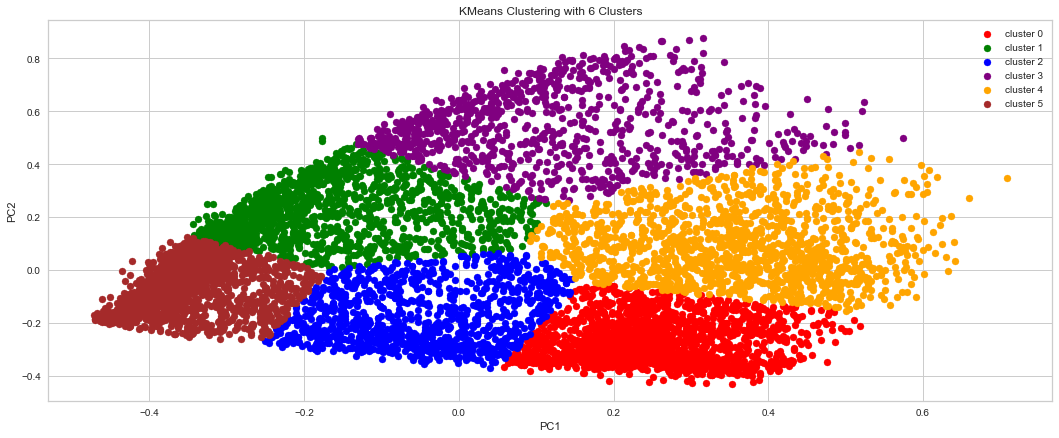

In [32]:
# PCA clusters visualization
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(Xn))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']

plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 0')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [52]:
# create model with 6 clusters
kmean= KMeans(6, random_state=42)
kmean.fit(Xn)
labels=kmean.labels_

# create new dataframe with clusters
clusters=pd.concat([df_imputed, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,431.220627,0.000000,12.0,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,4


###  Interpretation of Clusters

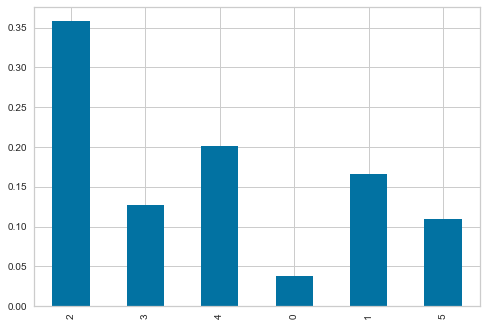

In [53]:
clusters['cluster'].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.show()

### Cluster 0  (Red): The High Riskers with lowest credit limit. With the highest minimum amount of payments,  purchases mostly in installments, 

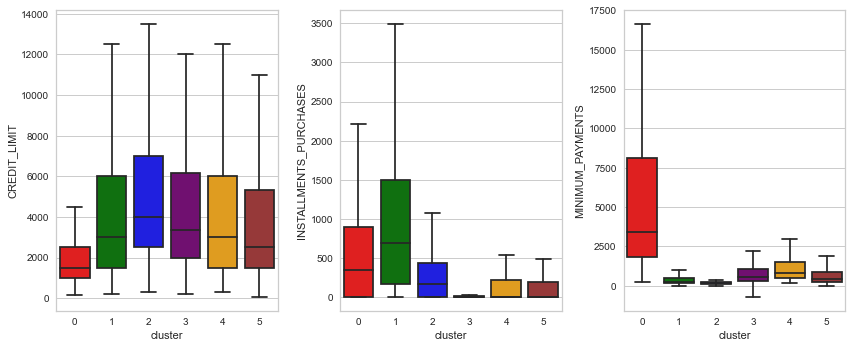

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))

#create boxplot in each subplot
sns.boxplot(data=clusters, x='cluster', y='CREDIT_LIMIT', ax=axes[0], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='INSTALLMENTS_PURCHASES', ax=axes[1], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='MINIMUM_PAYMENTS', ax=axes[2], showfliers=False, palette=colors)
fig.tight_layout()
plt.show()

### Cluster 1 (Green): The Big Money Spenders with the highest number of purchases (mostly done  in installments), highest payments

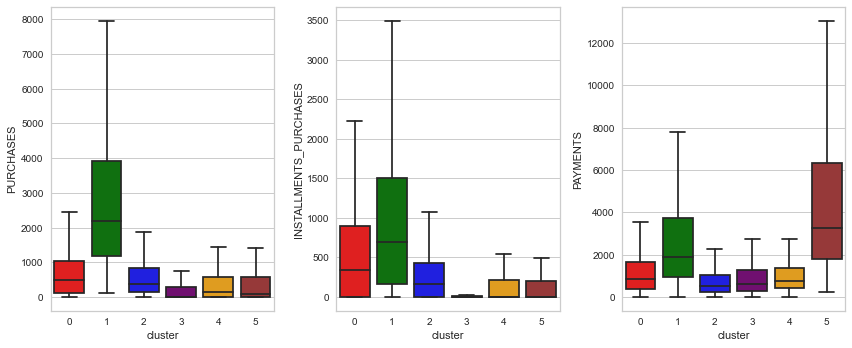

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))

#create boxplot in each subplot
sns.boxplot(data=clusters, x='cluster', y='PURCHASES', ax=axes[0], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='INSTALLMENTS_PURCHASES', ax=axes[1], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='PAYMENTS', ax=axes[2], showfliers=False, palette=colors)
fig.tight_layout()
plt.show()

### Cluster 2 (Blue) the biggest group with highest average credit limit. With small balance (amount left in their account to make purchases) and small cash in advance given by the user

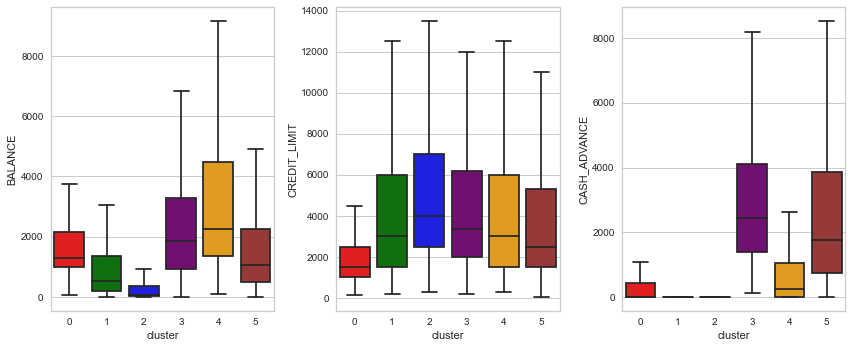

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))

#create boxplot in each subplot
sns.boxplot(data=clusters, x='cluster', y='BALANCE', ax=axes[0], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='CREDIT_LIMIT', ax=axes[1], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='CASH_ADVANCE', ax=axes[2], showfliers=False, palette=colors)
fig.tight_layout()
plt.show()

#### Cluster 3 People with shortest tenure, that's why also smallest number of purchases.  With the highest cash in advance given by the user

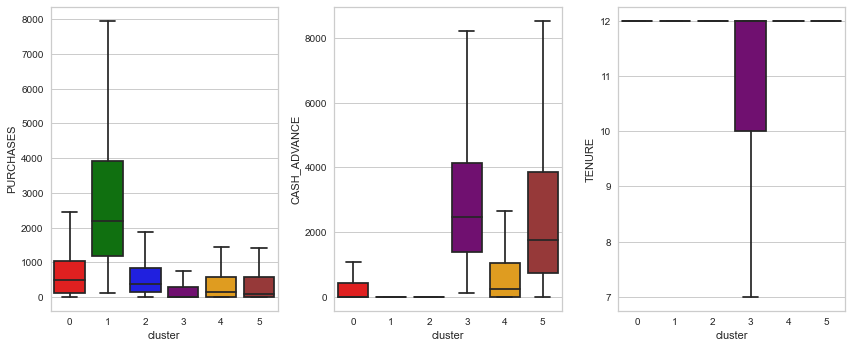

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))

#create boxplot in each subplot
sns.boxplot(data=clusters, x='cluster', y='PURCHASES', ax=axes[0], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='CASH_ADVANCE', ax=axes[1], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='TENURE', ax=axes[2], showfliers=False, palette=colors)
fig.tight_layout()
plt.show()

#### Cluster 4 (Yellow) with highest balance (amount left in their account to make purchases), average credit limit and small number of purchases

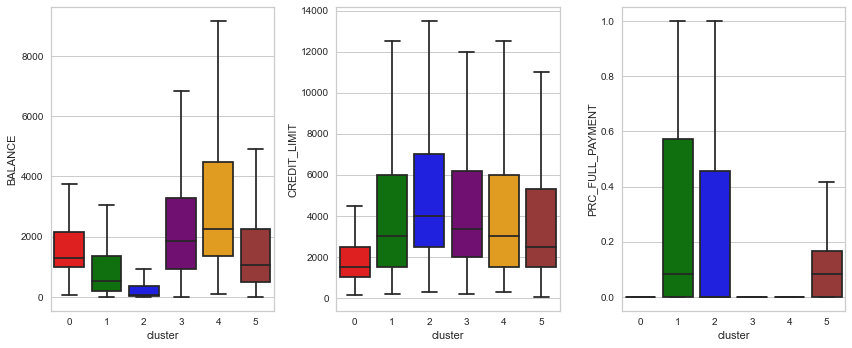

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))

#create boxplot in each subplot
sns.boxplot(data=clusters, x='cluster', y='BALANCE', ax=axes[0], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='CREDIT_LIMIT', ax=axes[1], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='PRC_FULL_PAYMENT', ax=axes[2], showfliers=False, palette=colors)
fig.tight_layout()
plt.show()

#### Cluster 5 (Brown): The Active Users with highest payments and cash in advance given by the user

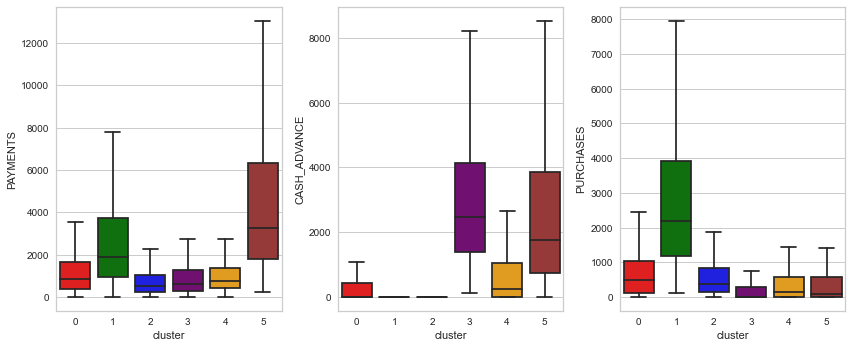

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))

#create boxplot in each subplot
sns.boxplot(data=clusters, x='cluster', y='PAYMENTS', ax=axes[0], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='CASH_ADVANCE', ax=axes[1], showfliers=False, palette=colors)
sns.boxplot(data=clusters, x='cluster', y='PURCHASES', ax=axes[2], showfliers=False, palette=colors)
fig.tight_layout()
plt.show()